## SVM Exercise

In [32]:
# import pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)
irisdata['class']= irisdata['class'].apply({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}.get)
irisdata.head()
#irisdata.iloc[60]

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


* create X, y

In [19]:
X = irisdata.drop("class", axis=1)
y = irisdata['class']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

* import train_test_split and split data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.head()

,sepal-length,sepal-width,petal-length,petal-width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


* import SVC from sklearn and use Polynomial kernel

In [28]:
clf = svm.SVC(kernel="poly")
scaler = StandardScaler()

In [33]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

* fit training data

In [34]:
clf.fit(X_train_scaled,y_train )

SVC(kernel='poly')

* predict X_test

In [35]:
y_pred = clf.predict(X_test_scaled)

In [37]:
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.9666666666666667


* import confusion matrix from sklearn and print values

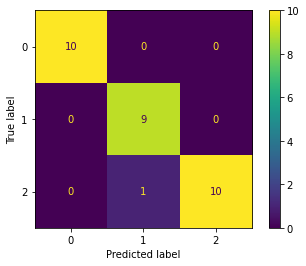

In [36]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

* create SVC with rbf kernel

In [38]:
rbf_model = svm.SVC(kernel="rbf")


* fit training data

In [39]:
rbf_model.fit(X_train_scaled, y_train)

SVC()

* predict X_test

In [40]:
rbf_pred = rbf_model.predict(X_test_scaled)

In [41]:
print("Accuracy", accuracy_score(y_test, rbf_pred))

Accuracy 1.0


* print confusion matrix

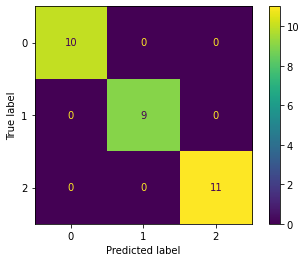

In [42]:
plot_confusion_matrix(rbf_model, X_test_scaled, y_test)

* create SVC with sigmoid kernel

In [43]:
sig = svm.SVC(kernel='sigmoid')

* fit training data

In [44]:
sig.fit(X_train_scaled, y_train)

SVC(kernel='sigmoid')

* predict X_test

In [45]:
sig_pred = sig.predict(X_test_scaled)

In [46]:
print("Accuracy:", accuracy_score(y_test, sig_pred))

Accuracy: 0.9


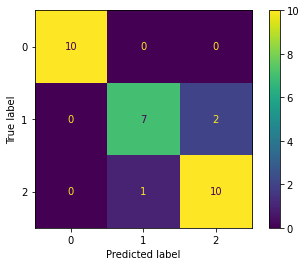

In [47]:
plot_confusion_matrix(sig, X_test_scaled, y_test)

#### Q: Which kernel was the most accurate on the testing set?

In [48]:
print("Accuracy of sigmoid kernel:", accuracy_score(y_test, sig_pred))
print("Accuracy of rbf kernel:", accuracy_score(y_test, rbf_pred))
print("Accuracy of polynomial kernal:", accuracy_score(y_test,y_pred))

Accuracy of sigmoid kernel: 0.9
Accuracy of rbf kernel: 1.0
Accuracy of polynomial kernal: 0.9666666666666667
